# COVID-19 Final Report

Analysis of COVID-19 Data. This report may not reflect Current Figures.

Importing of the Necessary Libraries.

In [1]:
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For plotting of the graphs

Importing the data from the `.csv` file. 

In [2]:
raw_data = pd.read_csv('data/covid_19_data.csv', sep=',')

The data Contains 8509 rows & 8 columns.

In [3]:
raw_data.shape

(17688, 8)

A sample of the imported Data.

In [4]:
raw_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
17683,17684,04/22/2020,Wyoming,US,2020-04-22 23:38:57,447.0,6.0,0.0
17684,17685,04/22/2020,Xinjiang,Mainland China,2020-04-22 23:38:57,76.0,3.0,73.0
17685,17686,04/22/2020,Yukon,Canada,2020-04-22 23:38:57,11.0,0.0,0.0
17686,17687,04/22/2020,Yunnan,Mainland China,2020-04-22 23:38:57,184.0,2.0,178.0


### Cleaning of the data using `.drop`

This was used to remove the  **_LastUpdate_** Column as this column displayed the Last Time each row of data was updated.

This Column was of no use in the analysis and was removed.

In [5]:
data = raw_data.drop('Last Update',axis=1)

### Setting the Index using `.set_index`

The index was set to 'SNo' To accurately count the cases.

The Index Name is displayed.

In [6]:
data.set_index('SNo', inplace=True)
data.index.name

'SNo'

### Checking the Data types for errors with `.dtypes`

The data types were checked and it was found that ObservationDate was an object instead of a date time.

In [7]:
pd.DataFrame(data.dtypes, columns=['Data Types'])

,Data Types
ObservationDate,object
Province/State,object
Country/Region,object
Confirmed,float64
Deaths,float64
Recovered,float64


Changing the Observation Date to an appropriate data type.

In [8]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

Sample of Data with all changes made.

In [9]:
data

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
SNo,,,,,,
1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
17684,2020-04-22,Wyoming,US,447.0,6.0,0.0
17685,2020-04-22,Xinjiang,Mainland China,76.0,3.0,73.0
17686,2020-04-22,Yukon,Canada,11.0,0.0,0.0


### Graph Showing the Confirmed Cases To Date

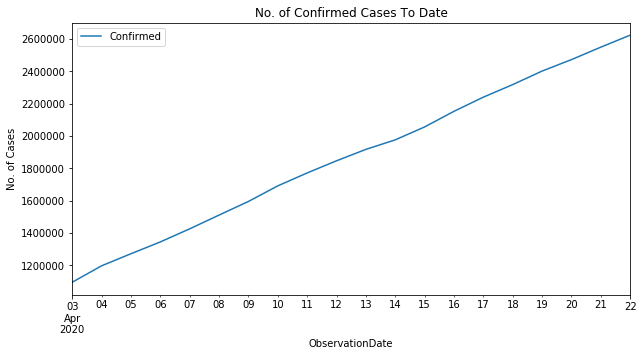

In [10]:
conf = data[['ObservationDate', 'Confirmed']]
conf[ ['ObservationDate', 'Confirmed'] ].groupby('ObservationDate').sum() \
                                       .sort_values(by='Confirmed', ascending=False) \
                                       .head(20) \
                                       .plot(figsize=(10,5))
plt.ylabel('No. of Cases')
plt.title('No. of Confirmed Cases To Date');

### Graph Showing The Recovered Cases To Date

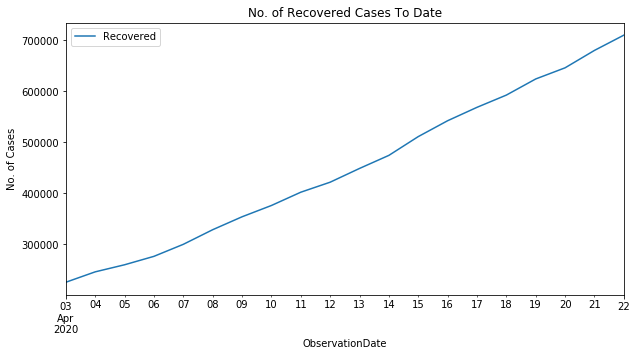

In [13]:
recov = data[['ObservationDate', 'Recovered']]
recov[ ['ObservationDate', 'Recovered'] ].groupby('ObservationDate').sum() \
                                       .sort_values(by='Recovered', ascending=False) \
                                       .head(20) \
                                       .plot(figsize=(10,5))
plt.ylabel('No. of Cases')
plt.title('No. of Recovered Cases To Date');

### Graph Showing The Death Rate To Date

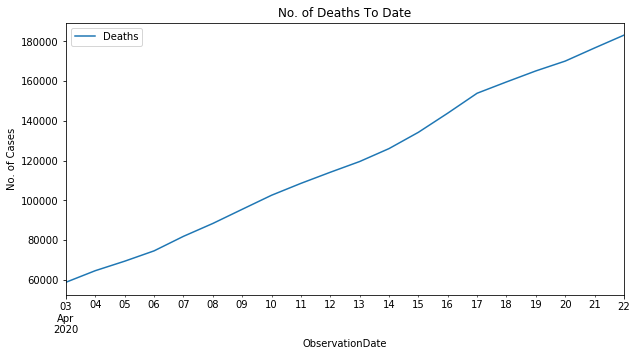

In [12]:
death = data[['ObservationDate', 'Deaths']]
death[ ['ObservationDate', 'Deaths'] ].groupby('ObservationDate').sum() \
                                       .sort_values(by='Deaths', ascending=False) \
                                       .head(20) \
                                       .plot(figsize=(10,5))
plt.ylabel('No. of Cases')
plt.title('No. of Deaths To Date');

### Graph Showing Confirmed Vs. Deaths

# Next Steps

To create a program of sorts to predict the end result of the virus.

To create a webpage for easier viewing of the data.